IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
#df_1.to_csv('totale.csv', index=False)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0    3.596543    3.414090 -0.014483  ... 

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0      30.0 -0.137650   0.041665   -1.544318   0.245973         86.0   
1      26.0 -0.065394   0.010612    0.867133   0.121901          0.0   
2      62.0 -0.043473   0.024867    1.826569   0.163391          0.0   
3      32.0 -0.055679   0.027462   -0.974715   0.174616          0.0   
4      23.0 -0.023365   0.009727    2.460746   0.101225         86.0   
...     ...       ...        ...         ...        ...          ...   
1344   21.0 -0.116827   0.039918   -0.470174   0.231214         57.0   
1345   72.0 -0.118572   0.033256   -0.656504   0.217340          0.0   
1346   37.0 -0.139637   0.041135   -1.527047   0.246023         89.0   
1347   59.0 -0.037033   0.020089   -0.235545   0.146327         94.0   
1348   43.0 -0.121795   0.038261   -0.371999   0.230213         72.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            67.0    5.032606    4.895252  0.027981  ... 

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.137650   0.041665   -1.544318   0.245973         86.0         67.0   
1    -0.065394   0.010612    0.867133   0.121901          0.0         72.0   
2    -0.043473   0.024867    1.826569   0.163391          0.0        100.0   
3    -0.055679   0.027462   -0.974715   0.174616          0.0         81.0   
4    -0.023365   0.009727    2.460746   0.101225         86.0         64.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.116827   0.039918   -0.470174   0.231214         57.0         78.0   
1345 -0.118572   0.033256   -0.656504   0.217340          0.0        129.0   
1346 -0.139637   0.041135   -1.527047   0.246023         89.0         69.0   
1347 -0.037033   0.020089   -0.235545   0.146327         94.0        124.0   
1348 -0.121795   0.038261   -0.371999   0.230213         72.0         53.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

### Bilanciamento del dataset

In [7]:
#separazione da tollerabile a non_tollerabile
no_guasto = df_1[df_1['Guasto'] == 0]
guasto_5 = df_1[df_1['Guasto'] == 1]
guasto_10 = df_1[df_1['Guasto'] == 2]

print("No Guasto: ", len(no_guasto), "Guasto 5%: ", len(guasto_5), "Guasto 10%: ", len(guasto_10))

No Guasto:  390 Guasto 5%:  418 Guasto 10%:  541


In [8]:
#bilanciamento del dataset
balanced_d = pd.concat([no_guasto, guasto_5.sample(len(no_guasto)), guasto_10.sample(len(no_guasto))])
#balanced_d = pd.concat([tollerabile, non_tollerabile.sample(len(tollerabile))])
x = balanced_d.iloc[:,:-1]
y = balanced_d.iloc[:,-1:]
balanced_d.shape

(1170, 169)

In [ ]:
'''x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]'''

In [ ]:
'''oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)'''

# Selezione feature più importanti

In [9]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=20)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=20, score_func=<function f_regression at 0x0000028DD35B0B80>)
[False False False False False False False False  True  True False  True
  True False  True False False False False False False False  True False
 False False False False  True False  True False  True False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False  True  True False False
 False False False False False False False False  True False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False

In [10]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

        Input_Features   F_Score
152     <>(RPM(ESC_5))  6.510776
155    RMS(RPM(ESC_5))  4.845866
34          kurt(AccY)  4.380475
28         freq1(AccX)  2.518154
12         freq1(GyrY)  2.354323
11           RMS(GyrY)  2.125615
9            var(GyrY)  1.990705
93   freq2(RPM(ESC_1))  1.973195
92   freq1(RPM(ESC_1))  1.964173
154   kurt(RPM(ESC_5))  1.912847
14          amp1(GyrY)  1.837734
161   var(Curr(ESC_5))  1.596880
104     <>(RPM(ESC_2))  1.395774
8             <>(GyrY)  1.345738
78    amp1(RPM(ESC_0))  1.313536
153    var(RPM(ESC_5))  1.298249
32            <>(AccY)  1.185376
107    RMS(RPM(ESC_2))  1.177690
22          amp1(GyrZ)  1.077536
30          amp1(AccX)  0.825560
62         amp1(Pitch)  0.779946
80     <>(Curr(ESC_0))  0.774174
76   freq1(RPM(ESC_0))  0.748503
17           var(GyrZ)  0.694059
19           RMS(GyrZ)  0.673511
77   freq2(RPM(ESC_0))  0.638086
4          freq1(GyrX)  0.637968
57          var(Pitch)  0.610811
158   amp1(RPM(ESC_5))  0.520484
15        

In [11]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[0, 1, 2, 3, 4, 5, 6, 7, 10, 13, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 167]


In [12]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  amp1(GyrY)  amp1(GyrZ)  \
1     0.020296   0.007308   0.087751        106.0    3.412772    4.682580   
6     0.031810   0.003712   0.068657        100.0    4.011039    5.299321   
9     0.012679   0.003101   0.057047         93.0    3.012344    0.447326   
11   -0.007438   0.006365   0.080033        129.0    2.670223    1.679719   
14    0.025824   0.007127   0.088171        101.0    3.984897    4.270934   
...        ...        ...        ...          ...         ...         ...   
1014  0.021498   0.006704   0.084555         88.0    2.543768    1.733874   
681   0.008182   0.025569   0.159926          0.0   15.856278    1.405311   
629   0.024505   0.007014   0.087167         95.0    2.558035    1.090114   
722  -0.041350   0.036866   0.196174          0.0   29.390328    1.343319   
734  -0.050460   0.040513   0.207232          0.0   38.801811    1.927944   

      freq1(AccX)  amp1(AccX)  <>(AccY)  kurt(AccY)  amp1(RPM(ESC_0))  \
1 

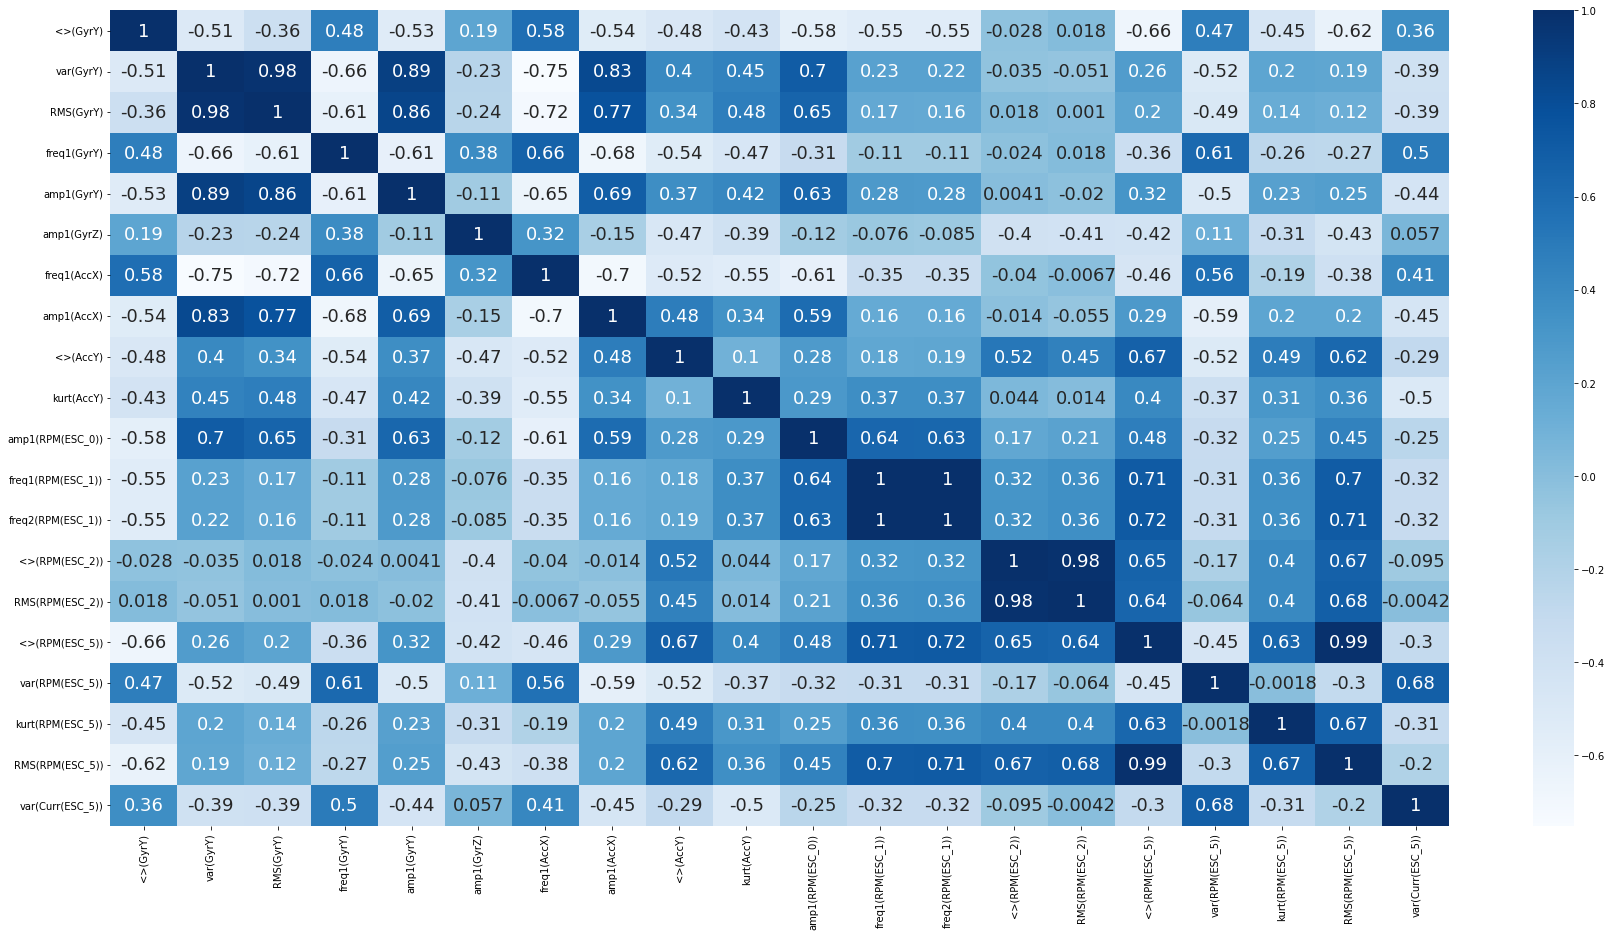

In [13]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

In [14]:
x = x.drop(['var(GyrY)','freq1(RPM(ESC_1))','<>(RPM(ESC_5))','RMS(RPM(ESC_2))'], axis=1)

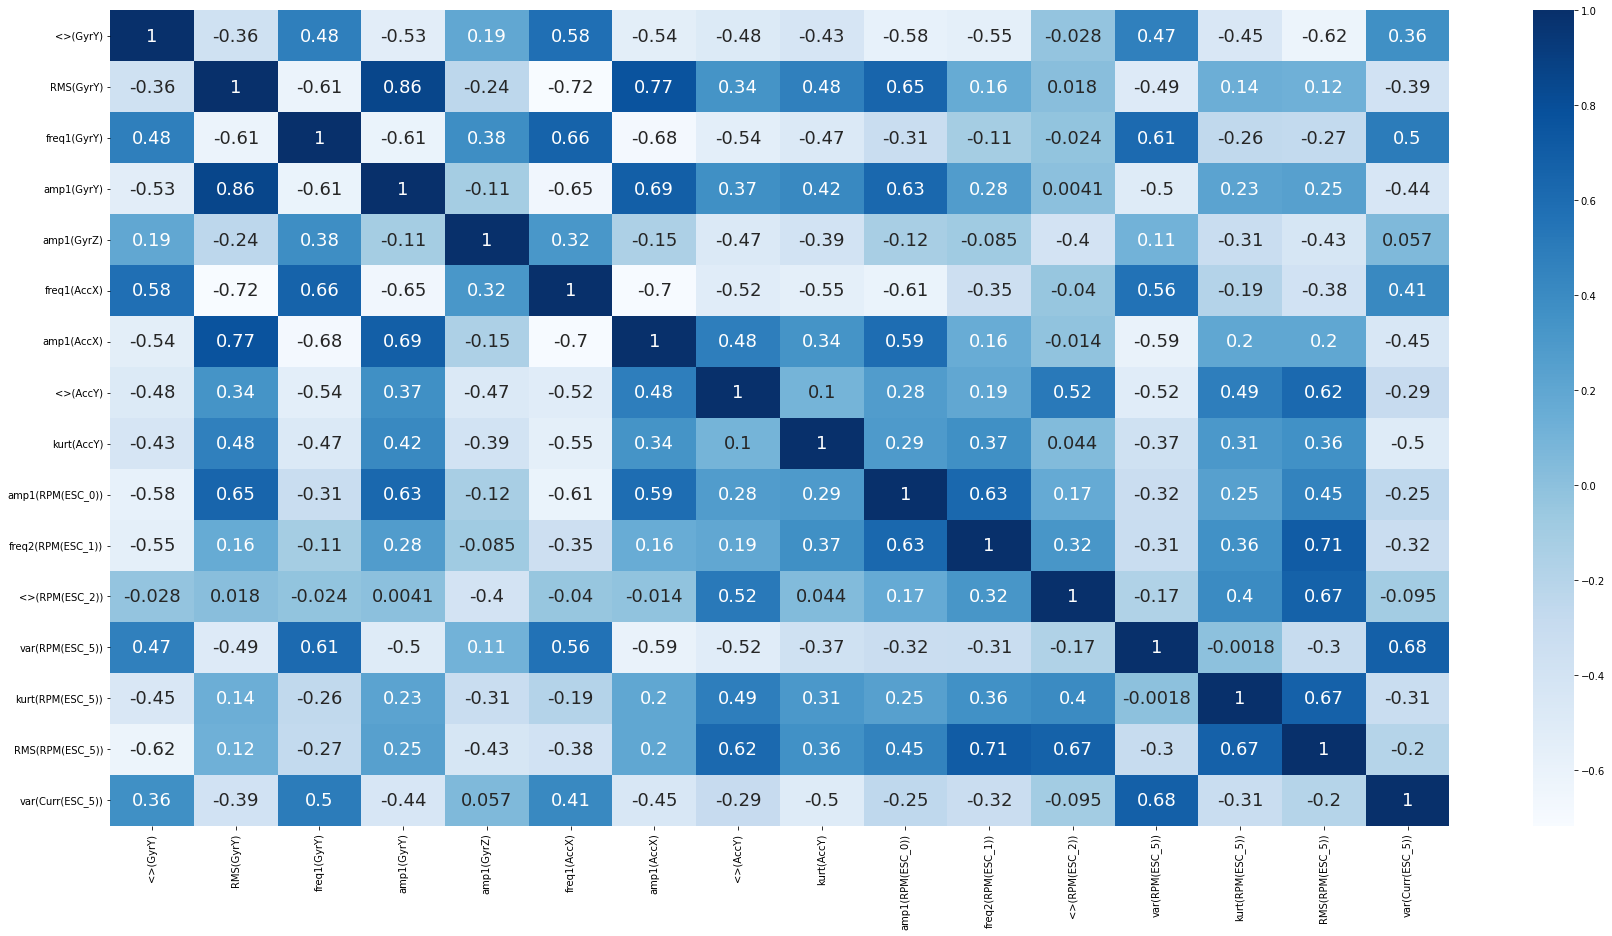

In [15]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [16]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(936, 16)
(234, 16)
(936, 1)
(234, 1)


In [17]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs, criterion="entropy"),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
    GradientBoostingClassifier(random_state= rs),
    AdaBoostClassifier(n_estimators=10, random_state= rs),
    LinearDiscriminantAnalysis(),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

Cross-Validation: [0.7712766  0.75935829 0.78074866 0.8342246  0.82352941]
Accuracy: 0.73 	 ---> LogisticRegression 


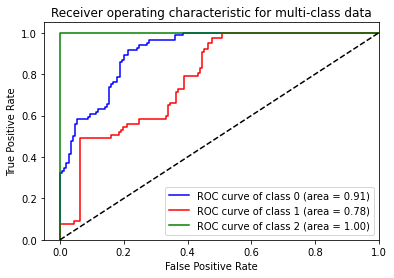

----------------------------------------------------
Cross-Validation: [1.         1.         0.99465241 1.         1.        ]
Accuracy: 1.0 	 ---> DecisionTreeClassifier 


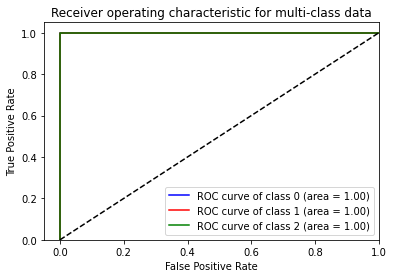

----------------------------------------------------
Cross-Validation: [1. 1. 1. 1. 1.]
Accuracy: 1.0 	 ---> RandomForestClassifier 


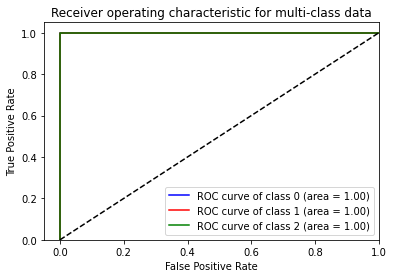

----------------------------------------------------
Cross-Validation: [0.9893617  1.         0.98930481 1.         1.        ]
Accuracy: 1.0 	 ---> GradientBoostingClassifier 


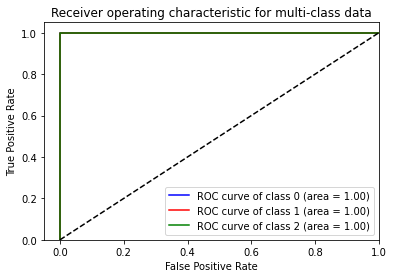

----------------------------------------------------
Cross-Validation: [1.         1.         0.93582888 1.         1.        ]
Accuracy: 1.0 	 ---> AdaBoostClassifier 


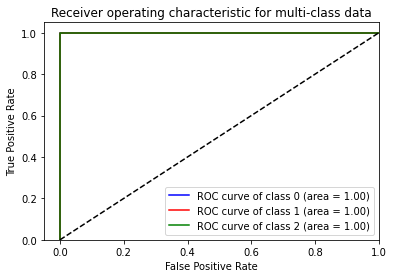

----------------------------------------------------
Cross-Validation: [0.99468085 1.         0.98930481 1.         1.        ]
Accuracy: 1.0 	 ---> LinearDiscriminantAnalysis 


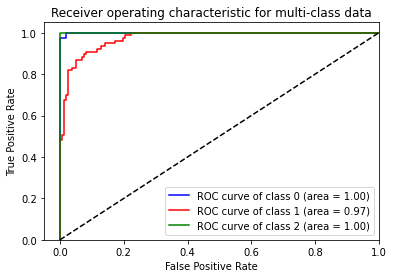

----------------------------------------------------
Cross-Validation: [0.74468085 0.71122995 0.73262032 0.78074866 0.75935829]
Accuracy: 0.72 	 ---> SVC 


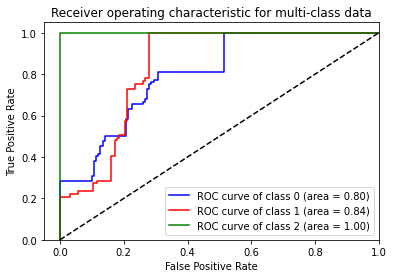

----------------------------------------------------
Cross-Validation: [0.54255319 0.61497326 0.64171123 0.62032086 0.36898396]
Accuracy: 0.51 	 ---> MLPClassifier 


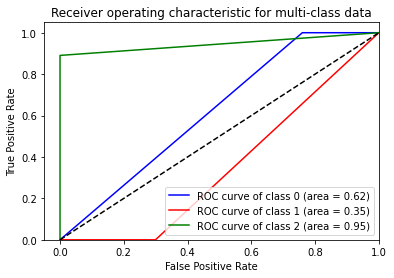

----------------------------------------------------
Cross-Validation: [0.46808511 0.5026738  0.56149733 0.50802139 0.51336898]
Accuracy: 0.44 	 ---> SGDClassifier 


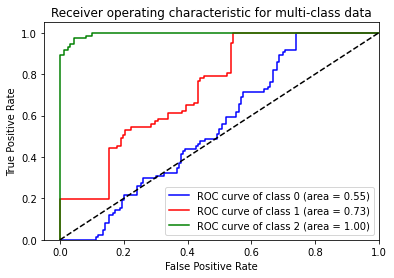

----------------------------------------------------


In [18]:
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

n_classes = 3

j=0
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    '''guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')'''    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    #fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)

    if (j == 1) | (j == 2) |(j == 7):
        y_score = clf.fit(x_train, y_train).predict_proba(x_test)
    else:
        clf = OneVsRestClassifier(clf)
        y_score = clf.fit(x_train, y_train).decision_function(x_test)

       

    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    
    j += 1

    print("----------------------------------------------------")

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


### Matrici di confusione

In [ ]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

Cross Validation Scores

In [ ]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

Report Classificazione

In [ ]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])